# Example of using `date_range` as DataFrame index

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import timedelta

%matplotlib inline

### Create a random series of values

In [2]:
random_dates = []
random_numbers = []
start_date = pd.Timestamp("2015-01-01").date()
date = start_date

for i in range(100):
    random_dates.append(date)
    random_numbers.append(np.random.randint(100))
    date = date + pd.Timedelta(days=np.random.randint(1, 3))  # skips ahead

In [3]:
data = {"Number": random_numbers}
index = pd.Index(random_dates, name="Date")

df_random_data = pd.DataFrame(data=data, index=index)
df_random_data.head()

,Number
Date,
2015-01-01,56
2015-01-02,37
2015-01-04,82
2015-01-05,0
2015-01-06,30


In [4]:
# Note: Some days have no number!
# Suppose, before we plot this, we want to add zeros for days with no number

In [5]:
# First create a date range that is complete
start_date = df_random_data.first_valid_index()
end_date = df_random_data.last_valid_index()

my_date_range = pd.date_range(start_date, end_date, freq='D')
my_date_range

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2015-05-22', '2015-05-23', '2015-05-24', '2015-05-25',
               '2015-05-26', '2015-05-27', '2015-05-28', '2015-05-29',
               '2015-05-30', '2015-05-31'],
              dtype='datetime64[ns]', length=151, freq='D')

In [6]:
index = pd.Index(my_date_range, name="date")

df_complete = pd.DataFrame(data=df_random_data, index=index)
df_complete.head()

,Number
date,
2015-01-01,56.0
2015-01-02,37.0
2015-01-03,NaN
2015-01-04,82.0
2015-01-05,0.0


In [7]:
# (Note: pandas changed the numbers to floats because 
# an integer array can't have NaN values)

df_complete = df_complete.fillna(0)
df_complete.head()

,Number
date,
2015-01-01,56.0
2015-01-02,37.0
2015-01-03,0.0
2015-01-04,82.0
2015-01-05,0.0


In [8]:
df_complete = df_complete.reset_index()
df_complete['Year'] = df_complete['date'].dt.year
df_complete['Month'] = df_complete['date'].dt.month
df_complete = df_complete.set_index('date', drop=True)
df_complete.head()

,Number,Year,Month
date,,,
2015-01-01,56.0,2015,1
2015-01-02,37.0,2015,1
2015-01-03,0.0,2015,1
2015-01-04,82.0,2015,1
2015-01-05,0.0,2015,1


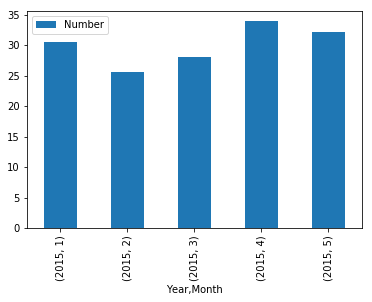

In [9]:
total_by_month = df_complete.groupby(['Year', 'Month']).mean()
total_by_month.plot(kind='bar')